# Aplicación del algoritmo KNN a una distribución de datos para clasificación y regresión

## Cuaderno de apoyo para Tarea 1 de Sistemas de Aprendizaje Automático

Comenzamos cargando el Dataset de edificios ya existentes:

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/jayanezj/IABD-SAA/main/unidad-1/entregable/knn-dataset.csv")

df

,Latitud,Longitud,ID,Precio,Barrio
0,51.506154,-0.128954,1,251909,A
1,51.507397,-0.126523,2,305719,C
2,51.509223,-0.126413,3,271750,B
3,51.506796,-0.127479,4,312046,C
4,51.507946,-0.126172,5,263083,A
5,51.509256,-0.129790,6,289386,B
6,51.504842,-0.130012,7,378712,D
7,51.505847,-0.126138,8,260660,B
8,51.507197,-0.126308,9,262307,A
9,51.507943,-0.126733,10,315461,C


Y Por otra parte preparamos el que será la nueva vivienda que añadiermos al Dataset cuando calculemos su Barrio y precio aplicando el algoritmo KNN

In [12]:
new_df = pd.DataFrame([[51.5074, -0.1278, 13, None, None, 0 ]], columns = ['Latitud', 'Longitud', 'ID', 'Precio', 'Barrio', 'Distancia'])

new_df

,Latitud,Longitud,ID,Precio,Barrio,Distancia
0,51.5074,-0.1278,13,None,None,0


## Aplicando KNN para K=3

El objetivo de aplicar el algoritmo de 'K' Nearest Neighbors es encontrar las 3 viviendas más cercanas a nuestra nueva vivienda para determinar así el barrio al que pertenece.

Disponemos de las latitudes y longitudes de las viviendas del dataset así como de la nueva vivienda, así que podemos utilizar la Métrica Euclídea para calcular la distancia de todas las vivienda del Dataset a nuestra nueva vivienda y de este modo determinar cuáles son las 3 más cercanas:

In [81]:
from urllib.request import urlopen

base_url = 'http://93.93.119.241/webservice/endpoint.php'
distance_new_housing = []

for index in df.index:
  url_call = base_url \
  + '?lat1=' + str(new_df['Latitud'][0]) \
  + '&lon1=' + str(new_df['Longitud'][0]) \
  + '&lat2=' + str(df['Latitud'][index]) \
  + '&lon2=' + str(df['Longitud'][index])

  response = urlopen(url_call).read()
  distance_new_housing.append(int(response))

df['Distancia'] = distance_new_housing

df.sort_values(by=['Distancia'])

,Latitud,Longitud,ID,Precio,Barrio,Distancia
3,51.506796,-0.127479,4,312046,C,71
1,51.507397,-0.126523,2,305719,C,88
9,51.507943,-0.126733,10,315461,C,95
8,51.507197,-0.126308,9,262307,A,106
4,51.507946,-0.126172,5,263083,A,128
0,51.506154,-0.128954,1,251909,A,160
7,51.505847,-0.126138,8,260660,B,208
2,51.509223,-0.126413,3,271750,B,224
5,51.509256,-0.129790,6,289386,B,248
11,51.504820,-0.129746,12,369441,D,317


Como vemos, las tres viviendas más cercanas a nuestra nueva vivienda pertenecen al barrio "C", así que nuestra nueva vivienda también pertenecerá a este barrio.

In [13]:
new_df.at[0, 'Barrio'] = 'C'

new_df

,Latitud,Longitud,ID,Precio,Barrio,Distancia
0,51.5074,-0.1278,13,None,C,0


## KNN con problema de Regresión

Nuestro siguiente objetivo es calcular el precio de la nueva vivienda, una cifra que se basará en el barrio en el que está ubicada.

Como ya hemos determinado con KNN el barrio en el que está ubicada lo que debemos hacer es calcular la media de precio de las viviendas de este barrio para obtener el precio de venta de la nueva vivienda.

En el enunciado del caso práctico no se especifica y el número de viviendas del Barrio C es tres, por lo que aunque no apliquemos un KNN donde K=3 el resultado será el mismo, pero si quisiéramos que el valor de la nueva vivienda también fuera determinado con KNN donde K=3 se realizaría de la siguiente forma:

In [76]:
import math

# Limitamos el DataFrame a viviendas del barrio C
rslt_df = df[df['Barrio'] == 'C']

# Ordenamos las viviendas por distancia a la nueva vivienda para
# quedarnos con las más cercanas
rslt_df = rslt_df.sort_values(by=['Distancia'], ignore_index=True)
total_price = 0

# Cogemos el precio de las 3 viviendas del Barrio C más cercanas
for i in range(3):
  total_price += rslt_df.at[i, 'Precio']


mean = total_price / 3

new_df.at[0, 'Precio'] = math.trunc(mean)

new_df

,Latitud,Longitud,ID,Precio,Barrio,Distancia
0,51.5074,-0.1278,13,311075,C,0


Ahora que ya hemos determinado el precio de la nueva vivienda podemos añadirla a nuestro Dataset y eliminar la columna de cálculo de distancia

In [45]:
merged_df = pd.concat([df, new_df], ignore_index=True)

merged_df = merged_df.drop('Distancia', axis=1)

merged_df

,Latitud,Longitud,ID,Precio,Barrio
0,51.506154,-0.128954,1,251909,A
1,51.507397,-0.126523,2,305719,C
2,51.509223,-0.126413,3,271750,B
3,51.506796,-0.127479,4,312046,C
4,51.507946,-0.126172,5,263083,A
5,51.509256,-0.129790,6,289386,B
6,51.504842,-0.130012,7,378712,D
7,51.505847,-0.126138,8,260660,B
8,51.507197,-0.126308,9,262307,A
9,51.507943,-0.126733,10,315461,C


## Extra: gráficos relacionados al caso práctico

Podemos observar visualmente como efectivamente la nueva vivienda (marcada en morado) está junto a las viviendas del barrio C (marcadas en azul).

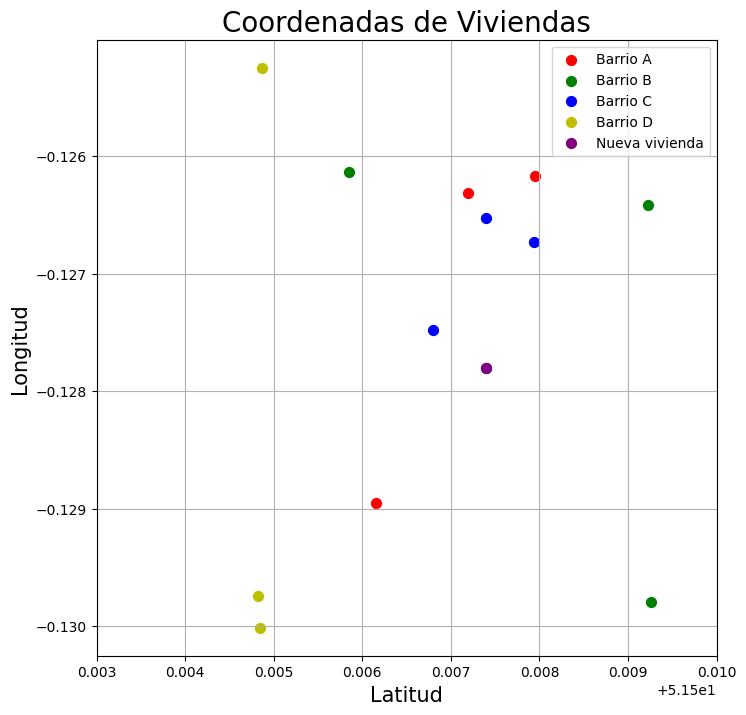

In [80]:
import matplotlib.pyplot as plt

# Pintamos el gráfico
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Latitud', fontsize = 15)
ax.set_xlim(51.50300,51.51000)
ax.set_ylabel('Longitud', fontsize = 15)
ax.set_title('Coordenadas de Viviendas', fontsize = 20)
targets = ['A', 'B', 'C', 'D']
legend = ['Barrio A', 'Barrio B', 'Barrio C', 'Barrio D', 'Nueva vivienda']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = merged_df['Barrio'] == target
    ax.scatter(merged_df.loc[indicesToKeep, 'Latitud']
               , merged_df.loc[indicesToKeep, 'Longitud']
               , c = color
               , s = 50)
ax.scatter(merged_df.loc[12, 'Latitud']
            , merged_df.loc[12, 'Longitud']
            , c = 'purple'
            , s = 50)
ax.legend(legend)
ax.grid()

También podemos observar como el precio calculado de nuestra nueva vivienda (morado) se mueve en los márgenes esperables según las viviendas con las que comparte barrio (azul)

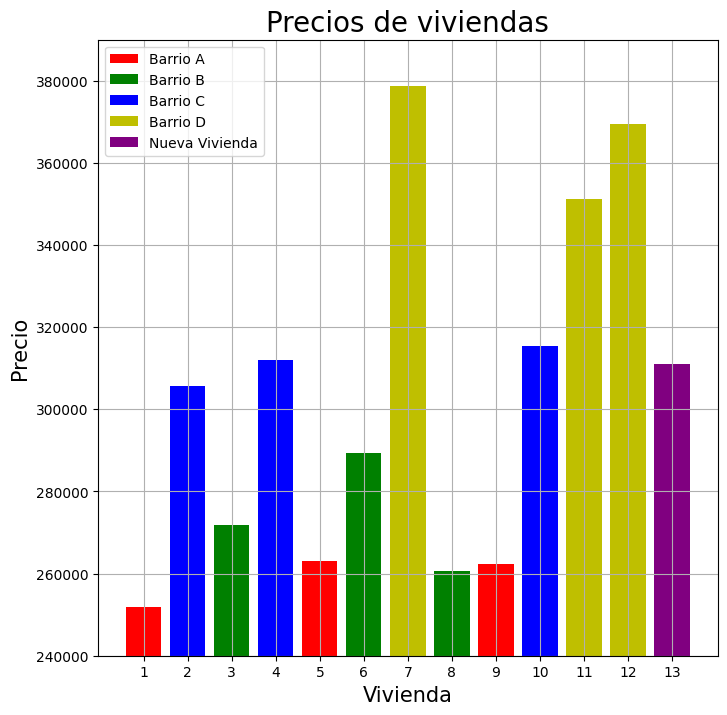

In [77]:
# Pintamos el gráfico
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Vivienda', fontsize = 15)
ax.set_xticks(range(1,14, 1))
ax.set_ylabel('Precio', fontsize = 15)
ax.set_title('Precios de viviendas', fontsize = 20)
ax.set_ylim(240000, 390000)
targets = ['A', 'B', 'C', 'D']
legend = ['Barrio A', 'Barrio B', 'Barrio C', 'Barrio D', 'Nueva Vivienda']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = merged_df['Barrio'] == target
    ax.bar(merged_df.loc[indicesToKeep, 'ID']
               , merged_df.loc[indicesToKeep, 'Precio']
               , color = color)
ax.bar(merged_df.loc[12, 'ID']
            , merged_df.loc[12, 'Precio']
            , color = 'purple')
ax.legend(legend, loc='upper left')
ax.grid()